<a href="https://colab.research.google.com/github/matheusmf1/ECM514_Data_Science/blob/master/Atividade01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 01 - Matheus Mandotti RA: 16.00177-0

# Extrair 20 informações:
- IDH das cidades: média, máximo, mínimo
- Comparar Graficamente os idh's e plotar 
- Comparar renda
- Procurar mais informações que agreguem valor

## Imports

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importação dos dados

In [0]:
# sep is necessary to read the file, as like the files in excel are divided using ;

# Importaremos o CSV BRAZIL_CITIES
br_cities = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science Class/DataSets/Atividade01/BRAZIL_CITIES.csv', delimiter =';', decimal =',')

# Importaremos o CSV Data_dictionary
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science Class/DataSets/Atividade01/Data_Dictionary.csv', sep=";") 

## Overview dos dados

In [3]:
data.rename( columns = { 'WALLMART' : 'WAL-MART' }, inplace = True )

data[ [ 'FIELD', 'DESCRIPTION' ] ].apply( lambda x: x.dropna() ).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
FIELD,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,...,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WALLMART,POST_OFFICES
DESCRIPTION,Name of the City,Name of the State,1 if Capital of State,Resident Population,Resident Population Brazilian,Redident Population Foreigners,Domestic Units Total,Domestic Units Urban,Domestic Units Rural,Resident Population Regular Urban Planning,Resident Population Regular Urban Planning - u...,Resident Population Regular Urban Planning - f...,Resident Population Regular Urban Planning - f...,Resident Population Regular Urban Planning - f...,Resident Population Regular Urban Planning - f...,Resident Population Regular Urban Planning - a...,Planted Area (hectares),Crop Production,HDI Ranking,HDI Human Development Index,HDI GNI Index,HDI Life Expectancy index,HDI Education index,City Latitude,City Longitude,City Elevation (meters),PayTV users,Fixed Fones (not cell phones) users,City area (squared kilometers),Turism Category Region,Turism Category,Estimated Population,Rural or Urban Tipology,Gross Added Value - Agropecuary,Gross Added Value - Industry,Gross Added Value - Services,Gross Added Value - Public Services,Total Gross Added Value,Taxes,Gross Domestic Product,...,Gross Domestic Product per capita,Activity with higher GVA contribution,Municipal expenditures - in reais,Total number of companies,"Number of Companies: Agriculture, livestock, f...",Number of Companies: Extractive industries,Number of Companies: Industries of transformation,Number of Companies: Electricity and gas,"Number of Companies: Water, sewage, waste mana...",Number of Companies: Construction,Number of Companies: Trade; repair of motor ve...,"Number of Companies: Transport, storage and mail",Number of Companies: Accommodation and food,Number of Companies: Information and communica...,"Number of Companies: Financial, insurance and ...",Number of Companies: Real estate activities,"Number of Companies: Professional, scientific ...",Number of Companies: Administrative activities...,"Number of Companies: Public administration, de...",Number of Companies: Education,Number of Companies: Human health and social s...,"Number of Companies: Arts, culture, sport and ...",Number of Companies: Other service activities,Number of Companies: Domestic services,Number of Companies: International and other e...,Total number of hotels,Toal number of hotel beds,Total number of private bank agencies,Total number of public bank agencies,Total number of private banks,Total number of public banks,Total amount of private bank assets,Total amount of public bank assets,Total number of cars,"Total number of motorcycles, scooters, moped",Total number of wheeled tractors,1 if UBER,Total number of Mac Donalds stores,Total number of Walmart Stores,Total number of post offices


In [11]:
# Mostra um overview das 5 primeiras linhas
br_cities.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,...,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,São Paulo,SP,1,11253503.0,11133776.0,119727.0,3576148.0,3548433.0,27715.0,10463636.0,129464.0,514794.0,684443.0,783702.0,7058221.0,1293012.0,94.0,1134.0,28.0,0.805,0.843,0.855,0.725,-46.570383,-23.567386,783.62,2047668.0,5543127.0,1521.11,Capital,A,12176866.0,Urbano,43867.07,63306754.97,4.646570e+08,41902892.72,5.699105e+08,1.171254e+08,6.870359e+08,...,57071.43,Demais serviços,4.577250e+10,530446.0,739.0,79.0,31566.0,332.0,657.0,25222.0,150633.0,19515.0,29290.0,38720.0,23738.0,14003.0,49181.0,76757.0,153.0,16030.0,22248.0,6687.0,24832.0,0.0,64.0,57.0,10022.0,1693.0,626.0,83.0,8.0,1.947077e+13,2.893261e+12,5740995.0,1134570.0,3236.0,1.0,130.0,7.0,225.0
1,Osasco,SP,0,666740.0,664447.0,2293.0,202009.0,202009.0,NaN,616068.0,8089.0,32305.0,42733.0,49379.0,420590.0,62972.0,0.0,0.0,174.0,0.780,0.776,0.840,0.718,-46.788810,-23.533612,742.97,98664.0,231302.0,64954.00,Negócios E Cultura,B,696850.0,Urbano,947.16,3036.39,5.311143e+07,2627577.24,5.877635e+07,1.562634e+07,7.440269e+07,...,106841.78,Demais serviços,1.758451e+09,15315.0,11.0,2.0,863.0,1.0,29.0,703.0,6002.0,1026.0,1230.0,706.0,271.0,238.0,761.0,1535.0,6.0,527.0,492.0,142.0,770.0,0.0,0.0,2.0,272.0,67.0,26.0,10.0,2.0,6.732330e+12,1.321699e+10,283641.0,73477.0,174.0,NaN,7.0,1.0,10.0
2,Rio De Janeiro,RJ,1,6320446.0,6264915.0,55531.0,2147235.0,2147235.0,NaN,5426838.0,58958.0,235380.0,321084.0,382267.0,3559037.0,870112.0,2098.0,41072.0,46.0,0.799,0.840,0.845,0.719,-43.227875,-22.876652,11.80,1271672.0,2417123.0,1200255.00,Metropolitana,A,6688927.0,Urbano,81.37,36334430.50,1.773611e+08,47548.35,2.613252e+08,6.810612e+04,3.294314e+08,...,50690.82,Demais serviços,2.364284e+10,190038.0,172.0,274.0,6824.0,235.0,272.0,7797.0,47545.0,4825.0,12289.0,9070.0,6327.0,4281.0,19248.0,34812.0,120.0,6744.0,9905.0,5039.0,14224.0,0.0,35.0,94.0,13247.0,815.0,304.0,34.0,5.0,2.283445e+12,9.738864e+11,2039930.0,363486.0,289.0,1.0,68.0,1.0,120.0
3,Brasília,DF,1,2570160.0,2564370.0,5790.0,774820.0,751558.0,23261.0,2450634.0,35833.0,143641.0,190078.0,207283.0,1683918.0,189881.0,162894.0,822413.0,9.0,0.820,0.863,0.873,0.742,-47.887905,-15.794087,1115.25,460682.0,920410.0,5760783.00,Brasília - Patrimônio Cultural Da Humanidade,A,2974703.0,Urbano,820754.66,9659849.10,1.038195e+08,92051.45,2.063515e+08,2.914559e+07,2.354971e+08,...,79099.77,"Administração, defesa, educação e saúde públic...",NaN,86200.0,242.0,42.0,3269.0,22.0,130.0,4685.0,29018.0,2157.0,6788.0,3254.0,1527.0,1670.0,6717.0,10346.0,204.0,3043.0,5363.0,1197.0,6403.0,0.0,123.0,23.0,4960.0,150.0,274.0,14.0,4.0,2.920933e+11,8.016164e+12,1288107.0,211392.0,594.0,1.0,28.0,1.0,60.0
4,Porto Alegre,RS,1,1409351.0,1403450.0,5901.0,508503.0,508503.0,NaN,1339712.0,15235.0,58369.0,79310.0,93989.0,889503.0,203306.0,766.0,7967.0,32.0,0.805,0.867,0.857,0.702,-51.228660,-30.030037,42.24,352371.0,663846.0,495.39,Porto Alegre,A,1479101.0,Urbano,28354.58,6768083.47,4.893041e+07,6712383.63,6.243923e+07,1.098603e+07,7.342526e+04,...,49577.53,Demais serviços,5.358322e+09,80082.0,196.0,31.0,3482.0,57.0,95.0,4039.0,21550.0,2523.0,4205.0,3555.0,2461.0,1924.0,8139.0,16271.0,72.0,2217.0,3489.0,1339.0,4429.0,0.0,8.0,17.0,3548.0,180.0,168.0,20.0,3.0,2.709619e+11,4.026997e+11,608777.0,106829.0,1383.0,1.0,19.0,12.0,53.0


In [5]:
# Mostra o nome de cada coluna
br_cities.columns

Index(['CITY', 'STATE', 'CAPITAL', 'IBGE_RES_POP', 'IBGE_RES_POP_BRAS',
       'IBGE_RES_POP_ESTR', 'IBGE_DU', 'IBGE_DU_URBAN', 'IBGE_DU_RURAL',
       'IBGE_POP', 'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
       'IBGE_15-59', 'IBGE_60+', 'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$',
       'IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 'IDHM_Longevidade',
       'IDHM_Educacao', 'LONG', 'LAT', 'ALT', 'PAY_TV', 'FIXED_PHONES', 'AREA',
       'REGIAO_TUR', 'CATEGORIA_TUR', 'ESTIMATED_POP', 'RURAL_URBAN',
       'GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC',
       ' GVA_TOTAL ', 'TAXES', 'GDP', 'POP_GDP', 'GDP_CAPITA', 'GVA_MAIN',
       'MUN_EXPENDIT', 'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D',
       'COMP_E', 'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
       'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q', 'COMP_R',
       'COMP_S', 'COMP_T', 'COMP_U', 'HOTELS', 'BEDS', 'Pr_Agencies',
       'Pu_Agencies', 'Pr_Bank', 'Pu_Bank', 'P

In [0]:
# Ajuste no nome de uma coluna
br_cities.rename( columns = { ' GVA_TOTAL ' : 'GVA_TOTAL' }, inplace = True )

In [0]:
# Quantidade de linhas e colunas do DataFrame
br_cities.info()

In [8]:
# DataFrame de forma resumida 
br_cities.describe()

,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60+,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,ESTIMATED_POP,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,POP_GDP,GDP_CAPITA,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
count,5576.000000,5.568000e+03,5.568000e+03,5568.000000,5.566000e+03,5.566000e+03,5495.000000,5.568000e+03,5568.000000,5568.000000,5568.000000,5568.000000,5.568000e+03,5.568000e+03,5.573000e+03,5.573000e+03,5568.000000,5568.000000,5568.000000,5568.000000,5568.000000,5567.000000,5567.000000,5567.000000,5.573000e+03,5.573000e+03,5.574000e+03,5.573000e+03,5.573000e+03,5.573000e+03,5.573000e+03,5.573000e+03,5.573000e+03,5.573000e+03,5.573000e+03,5.573000e+03,5573.000000,4.082000e+03,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.000000,5573.0,5573.000000,888.000000,888.000000,3345.000000,3345.000000,3345.000000,3345.000000,3.345000e+03,3.345000e+03,5.565000e+03,5.565000e+03,5565.000000,125.0,167.000000,103.000000,5456.000000
mean,0.004842,3.428459e+04,3.420705e+04,77.543642,1.030530e+04,8.861382e+03,1462.570337,2.760219e+04,383.356501,1544.858657,2069.675467,2381.876078,1.821685e+04,3.005576e+03,1.418350e+04,5.740766e+04,2782.284662,0.659223,0.642918,0.801586,0.559136,-46.227400,-16.447620,893.588998,3.095533e+03,6.568110e+03,1.241228e+06,3.743933e+04,4.725012e+04,1.758818e+05,4.895310e+05,1.237594e+05,8.332459e+05,1.188676e+05,9.546196e+05,3.700575e+04,21129.767244,1.042825e+08,907.253544,18.263772,1.853221,73.448233,0.425982,2.030684,43.273282,348.222322,41.007357,55.980800,24.749865,15.555715,15.143729,51.306298,83.718643,3.269693,30.973802,34.167055,12.184281,51.628566,0.0,0.050242,3.129505,257.483108,3.383558,2.828401,1.313303,1.579671,9.172327e+09,6.001000e+09,9.862797e+03,4.880992e+03,5.753279,1.0,4.257485,2.048544,2.080462
std,0.069423,2.030598e+05,2.014381e+05,1795.397085,6.475994e+04,6.435371e+04,1693.833786,1.859099e+05,2326.205751,9250.689121,12310.307735,14182.383292,1.251736e+05,2.324198e+04,4.404882e+04,1.481314e+05,1606.654986,0.071970,0.080668,0.044681,0.093351,6.408447,8.280170,17176.869857,3.578531e+04,8.797349e+04,4.991591e+06,2.199119e+05,8.863293e+04,1.262967e+06,7.120579e+06,6.929607e+05,9.291821e+06,1.708002e+06,1.121657e+07,2.169573e+05,20327.836119,8.644724e+08,8331.637406,81.029671,6.178546,499.733382,6.336557,11.751233,407.369084,2429.835487,300.450624,484.110972,547.443362,340.742105,212.640191,767.283706,1232.239175,6.056471,260.937133,366.179105,122.300106,429.601796,0.0,1.927245,6.576932,734.279574,34.214157,14.394513,2.143315,0.952681,3.584189e+11,1.503155e+11,9.186317e+04,2.093981e+04,55.365588,0.0,11.739627,3.376327,4.416694
min,0.000000,8.050000e+02,8.050000e+02,0.000000,2.390000e+02,6.000000e+01,3.000000,1.740000e+02,0.000000,5.000000,7.000000,12.000000,9.400000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.000000,0.418000,0.400000,0.672000,0.207000,-72.916501,-33.687567,0.000000,1.000000e+00,3.000000e+00,2.610000e+01,7.860000e+02,0.000000e+00,5.300000e-01,2.170000e+00,7.260000e+00,1.748000e+01,-1.415851e+04,1.496000e+01,8.150000e+02,3190.570000,1.420804e+06,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0

## Manipulação dos dados

### 01 - Top 5 cidades com paior população estimada

In [5]:
br_cities[ [ 'CITY','STATE', 'ESTIMATED_POP']  ].sort_values( by = 'ESTIMATED_POP', ascending = False ).head()

,CITY,STATE,ESTIMATED_POP
0,São Paulo,SP,12176866.0
2,Rio De Janeiro,RJ,6688927.0
3,Brasília,DF,2974703.0
10,Salvador,BA,2857329.0
15,Fortaleza,CE,2643247.0


### 02 - Top 5 polulação média estimada de cada Estado



In [7]:
br_cities.groupby( 'STATE' ).mean()['ESTIMATED_POP'].head()

STATE
AC    39512.045455
AL    32576.666667
AM    65816.306452
AP    51843.375000
BA    35521.863309
Name: ESTIMATED_POP, dtype: float64

### 03 - Cidades que possuem maior número de estrangeiros

In [6]:
df_estrangeiros = br_cities[ [ 'CITY','STATE', 'IBGE_RES_POP_ESTR', 'IBGE_RES_POP'] ].sort_values( by = ['IBGE_RES_POP_ESTR'], ascending = False ).head()
df_estrangeiros

,CITY,STATE,IBGE_RES_POP_ESTR,IBGE_RES_POP
0,São Paulo,SP,119727.0,11253503.0
2,Rio De Janeiro,RJ,55531.0,6320446.0
9,Curitiba,PR,8871.0,1751907.0
8,Santos,SP,6945.0,419400.0
5,Belo Horizonte,MG,6088.0,2375151.0


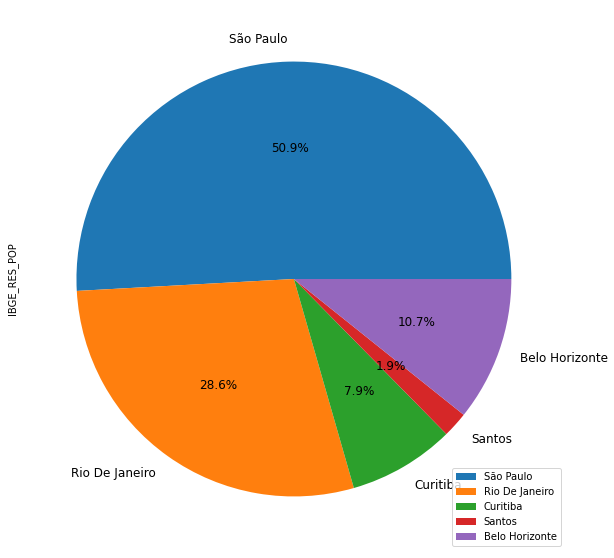

In [7]:
df_estrangeiros.plot( kind = 'pie', y = 'IBGE_RES_POP', autopct='%1.1f%%' , labels = df_estrangeiros[ 'CITY'], figsize = (10,10), fontsize = 12 )

### 04 - Cidades que possuem maior longevidade considerando IDH

In [8]:
df_longevidade = br_cities[ [ 'CITY','STATE','IBGE_60+', 'IBGE_RES_POP', 'IDHM_Longevidade' ] ].sort_values( by = ['IDHM_Longevidade', 'IBGE_60+'], ascending = False ).head(10)
df_longevidade

,CITY,STATE,IBGE_60+,IBGE_RES_POP,IDHM_Longevidade
40,Blumenau,SC,26940.0,309011.0,0.894
158,Balneário Camboriú,SC,11490.0,108089.0,0.894
139,Brusque,SC,9082.0,105503.0,0.894
249,Rio Do Sul,SC,6185.0,61198.0,0.894
3071,Rancho Queimado,SC,160.0,2748.0,0.893
2732,Rio Do Oeste,SC,469.0,7090.0,0.892
786,Porto União,SC,3348.0,33493.0,0.891
203,Joaçaba,SC,1989.0,27020.0,0.891
2398,Nova Trento,SC,1042.0,12190.0,0.891
3929,Iomerê,SC,162.0,2739.0,0.891


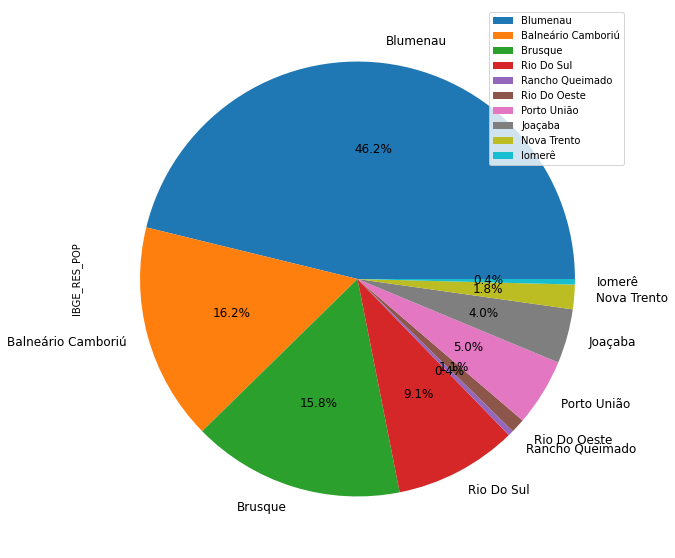

In [7]:
df_longevidade.plot( kind = 'pie', y = 'IBGE_RES_POP', autopct='%1.1f%%' , labels = df_longevidade[ 'CITY'], figsize = (10,10), fontsize = 12 )

### 05 - Quais são as top 5 cidades com a melhor classificação turistica?

In [37]:
categorias = br_cities[ 'CATEGORIA_TUR' ].notna()
br_cities[ categorias ][ br_cities['CATEGORIA_TUR'] == 'A' ][['CITY','STATE','CATEGORIA_TUR']].head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,CITY,STATE,CATEGORIA_TUR
0,São Paulo,SP,A
2,Rio De Janeiro,RJ,A
3,Brasília,DF,A
4,Porto Alegre,RS,A
5,Belo Horizonte,MG,A


### 06 - Quantas cidades possuem categoria turistica A?

##### Forma bonita

In [38]:
quantidade = list( filter( lambda x: 'a' in str(x).lower(), br_cities[ categorias ]['CATEGORIA_TUR'].tolist() ) )
len(quantidade)

52

###### Forma Simples

In [17]:
br_cities['CATEGORIA_TUR'].value_counts()

D    1893
E     653
C     522
B     168
A      52
Name: CATEGORIA_TUR, dtype: int64

### 07 - Quantidade de municípios para cada Estado com Uber e número total de carros

In [7]:
br_cities[ [ 'UBER','Cars' ] ] = br_cities[ [ 'UBER','Cars' ] ].fillna( value = 0 )

df_uber = br_cities.groupby( 'STATE' )[ [ 'UBER','Cars' ] ].sum().sort_values( by = [ 'UBER','Cars' ], ascending = False ).head()
df_uber

,UBER,Cars
STATE,,
SP,17.0,18314825.0
MG,17.0,6182231.0
RJ,11.0,4526405.0
PR,11.0,4438392.0
BA,10.0,1835913.0


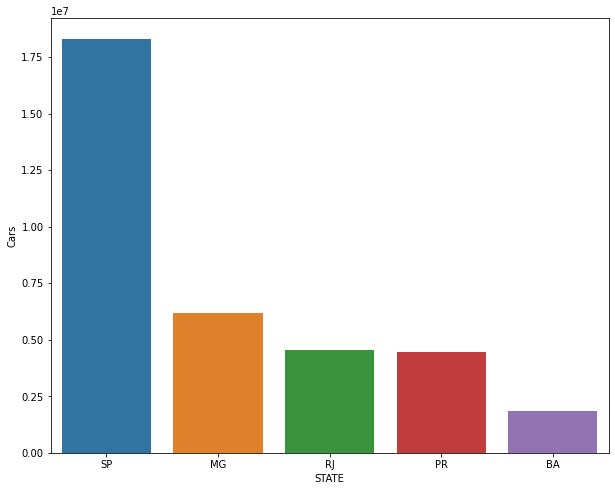

In [32]:
#df_uber.plot( kind = 'pie', y = 'Cars', autopct='%1.1f%%' , labels = df_uber.index, figsize = (10,10), fontsize = 12 )

plt.figure( figsize = (10, 8) )
sns.barplot( x = df_uber.index, y = df_uber['Cars'] )

### 08 - Quantidade de municípios com Uber


In [13]:
df_uber2 = br_cities.groupby( 'STATE' ).apply( lambda x: (x.UBER == 1).sum() ).sort_values( ascending = False ).head()
df_uber2

STATE
MG    17
SP    17
PR    11
RJ    11
BA    10
dtype: int64

### 09 - Média de carros por Estado

In [8]:
br_cities.groupby( 'STATE' )['Cars'].mean().sort_values( ascending = False ).head()

STATE
DF    1.288107e+06
RJ    4.867102e+04
SP    2.835112e+04
ES    1.232264e+04
PR    1.112379e+04
Name: Cars, dtype: float64

### 10 - Quais são as Cidades com maior número de Wal-Mart e Mc Donald's

In [18]:
br_cities[ [ 'CITY', 'MAC', 'WAL-MART' ] ].sort_values( by = ['MAC','WAL-MART'], ascending = False ).head()

,CITY,MAC,WAL-MART
0,São Paulo,130.0,7.0
2,Rio De Janeiro,68.0,1.0
3,Brasília,28.0,1.0
5,Belo Horizonte,21.0,2.0
9,Curitiba,20.0,16.0


### 11 - Quais são os Estados com maior número de Wal-Mart e Mc Donald's

In [10]:
df_WalMc = br_cities.groupby( 'STATE' )[ [ 'WAL-MART', 'MAC' ] ].count().sort_values( by = [ 'WAL-MART', 'MAC' ] , ascending = False ).head()
df_WalMc

,WAL-MART,MAC
STATE,,
RS,31,16
SP,26,64
BA,7,6
SC,6,13
PE,6,4


### 12 - Cidades com IDH para educação acima de 0.800

In [27]:
br_cities['IDHM_Educacao'] = br_cities['IDHM_Educacao'].fillna( value = 0 )

br_cities[ br_cities['IDHM_Educacao'].map( lambda x: x > 0.800 ) ][ ['CITY','STATE','IDHM_Educacao','IDHM_Longevidade'] ]

,CITY,STATE,IDHM_Educacao,IDHM_Longevidade
8,Santos,SP,0.807,0.852
28,São Caetano Do Sul,SP,0.811,0.887
42,Vitória,ES,0.805,0.855
1739,Águas De São Pedro,SP,0.825,0.890


### 13 - Existe correlação entre os melhores IDH para educação e Longevidade?

In [37]:
br_cities[ ['CITY','IDHM_Longevidade'] ].sort_values( by = 'IDHM_Longevidade', ascending = False ).head()

,CITY,IDHM_Longevidade
40,Blumenau,0.894
158,Balneário Camboriú,0.894
249,Rio Do Sul,0.894
139,Brusque,0.894
3071,Rancho Queimado,0.893


In [25]:
br_cities[ [ 'IDHM_Educacao','IDHM_Longevidade' ] ].corr()

,IDHM_Educacao,IDHM_Longevidade
IDHM_Educacao,1.000000,0.704506
IDHM_Longevidade,0.704506,1.000000


### 14 - Número de cidades que possuem mais do que 700.000,0 em áreas plantadas

In [24]:
br_cities['IBGE_PLANTED_AREA'] = br_cities['IBGE_PLANTED_AREA'].fillna( value = 0 )

len( list( filter( lambda x: x > 700000.0, br_cities[ 'IBGE_PLANTED_AREA' ].tolist() ) ) )

3

### 15 - Quais são as cidades que possuem maior área plantadas

In [17]:
df_plant = br_cities[ ['CITY', 'IBGE_PLANTED_AREA'] ].sort_values( by = 'IBGE_PLANTED_AREA', ascending = False ).head()
df_plant

,CITY,IBGE_PLANTED_AREA
110,Sorriso,1205669.0
946,Campo Novo Do Parecis,725170.0
1206,Sapezal,700837.0
1086,Nova Mutum,695636.0
34,Rio Verde,621420.0


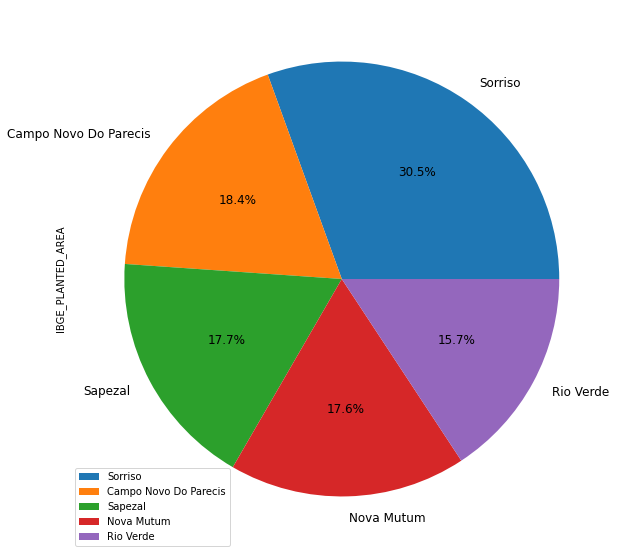

In [8]:
df_plant.plot( kind = 'pie', y = 'IBGE_PLANTED_AREA', autopct='%1.1f%%' , labels = df_plant[ 'CITY' ], figsize = (10,10), fontsize = 12 )

### 16 - Cidades com maior quantidade de veiulos e postos policiais

In [10]:
br_cities[ [ 'Motorcycles', 'POST_OFFICES' ] ] = br_cities[ [ 'Motorcycles', 'POST_OFFICES' ] ].apply( lambda x: x.fillna( value = 0 ) )

br_cities['Total Veiculos'] = br_cities[ 'Motorcycles' ] + br_cities[ 'Cars' ]

df_Vei = br_cities[ [ 'CITY','Total Veiculos', 'Cars', 'Motorcycles' ] ].sort_values( by = 'Total Veiculos', ascending = False ).head()

df_Vei

,CITY,Total Veiculos,Cars,Motorcycles
0,São Paulo,6875565.0,5740995.0,1134570.0
2,Rio De Janeiro,2403416.0,2039930.0,363486.0
5,Belo Horizonte,1687511.0,1439055.0,248456.0
3,Brasília,1499499.0,1288107.0,211392.0
9,Curitiba,1235858.0,1062063.0,173795.0


### 17 - Dentre essas cidades qual a relação de carros e motos

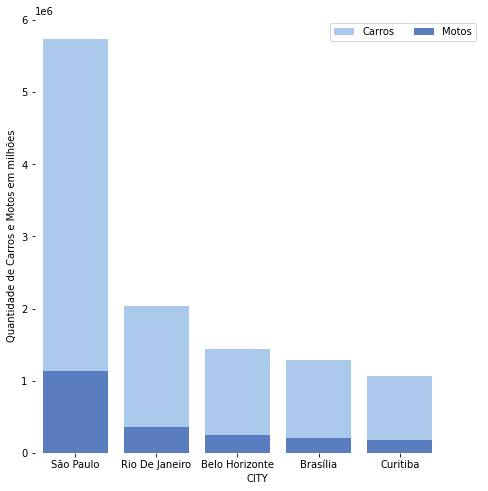

In [29]:
#df_Vei.plot( kind = 'pie', y = 'Total Veiculos', autopct='%1.1f%%' , labels = df_Vei[ 'CITY' ], figsize = (10,10), fontsize = 12 )

f, ax = plt.subplots(figsize=(8, 8))

# Plot Número de carros
sns.set_color_codes( 'pastel' )

sns.barplot( x = 'CITY', y = 'Cars', data = df_Vei, label = 'Carros', color = 'b',  )

# Plot Número de Motos
sns.set_color_codes( 'muted' ) 

sns.barplot( x = 'CITY', y = 'Motorcycles', data = df_Vei, label = 'Motos', color = 'b' )


# Legendas 
ax.legend( ncol=2, loc = "upper right", frameon=True )

ax.set( xlim=(-0.5, 5),ylabel="Quantidade de Carros e Motos em milhões" )

sns.despine(left=True, bottom=True)

### 18 - Quais capitais arrecadam mais imposto

In [58]:
br_cities[ br_cities['CAPITAL'].apply( lambda x: x == 1 ) ][[ 'CITY','TAXES' ]].sort_values( by = 'TAXES', ascending = False ).head()

,CITY,TAXES
0,São Paulo,1.171254e+08
3,Brasília,2.914559e+07
21,Manaus,1.243323e+07
4,Porto Alegre,1.098603e+07
15,Fortaleza,8.004144e+06


### 19 - Imposto Médio arrecado por pessoa nas Capitais

In [61]:
df_imposto = br_cities[ br_cities['CAPITAL'].apply( lambda x: x == 1 ) ][[ 'CITY','TAXES','IBGE_RES_POP' ]].sort_values( by = 'TAXES', ascending = False ).head()

df_imposto['TAX/PERSON'] = df_imposto[ 'TAXES' ]  / df_imposto[ 'IBGE_RES_POP' ]

df_imposto

,CITY,TAXES,IBGE_RES_POP,TAX/PERSON
0,São Paulo,1.171254e+08,11253503.0,10.407905
3,Brasília,2.914559e+07,2570160.0,11.339989
21,Manaus,1.243323e+07,1802014.0,6.899631
4,Porto Alegre,1.098603e+07,1409351.0,7.795102
15,Fortaleza,8.004144e+06,2452185.0,3.264087


### 20 - Quantas Capitais 

In [63]:
cap = list( filter( lambda x: x == 1 , br_cities['CAPITAL'].tolist() ) )
len( cap )

27